# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Jason Hendrawan
- **Email:** mc232d5y0476@student.devacademy.id
- **ID Dicoding:** MC232D5Y0476

## Menentukan Pertanyaan Bisnis

- Apakah Hari Kerja dan Hari Libur Memiliki Pengaruh Terhadap Jumlah Penyewaan Sepeda?
- Apakah Kondisi Cuaca Memiliki Pengaruh Terhadap Jumlah Penyewaan Sepeda? Jika iya, bagaimana bisa memiliki pengaruh?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [ ]:
data = pd.read_csv("day.csv")
df = pd.DataFrame(data)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Dataset yang saya pakai untuk projek akhir modul pembelajaran Belajar Analisis Data dengan Python adalah Dataset Bike Sharing yang saya dapatkan dari sumber yang merupakan platform andalan bagi praktisi data untuk mencari dataset yaitu Kaggle. Format dari dataset yang saya gunakan untuk projek akhir ini merupakan format file csv. Dataset ini mencakup data penyewaan harian sepeda selama 2 tahun dengan 4 musim yang berbeda.

### Assessing Data

In [ ]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_counts = {}

for col in numerical_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

print("\nOutlier Counts:")
for col, count in outlier_counts.items():
  print(f"{col}: {count}")


Outlier Counts:
instant: 0
season: 0
yr: 0
mnth: 0
holiday: 21
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 2
windspeed: 13
casual: 44
registered: 0
cnt: 0


In [ ]:
invalid_season = df[(df['season'] < 1) | (df['season'] > 4)].shape[0]
print("\nInvalid Values in 'season':", invalid_season)


Invalid Values in 'season': 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Bisa dilihat bahwa tidak terdapat nilai null pada dataset yang digunakan untuk proyek kali ini.
- Bisa dilihat bahwa tidak terdapat nilai yang terduplikasi pada dataset yang digunakan untuk proyek kali ini.
- Telah dilihat bahwa hanya terdapat outlier untuk kolom "holiday", "hum", "windspeed", "casual", dan tidak terdapat outlier pada kolom lainnya.
- Sebagai pelengkap, saya menambahkan deskripsi  statistik untuk dataset yang saya gunakan.

### Cleaning Data

**Karena tidak terdapat nilai yang terduplikasi dan tidak terdapat nilai null pada dataset yang digunakan, sehingga bagian "Cleaning Data" dilewati dan tidak dilakukan pembersihan data untuk dataset yang dugunakan.**


## Exploratory Data Analysis (EDA)

### Explore ...

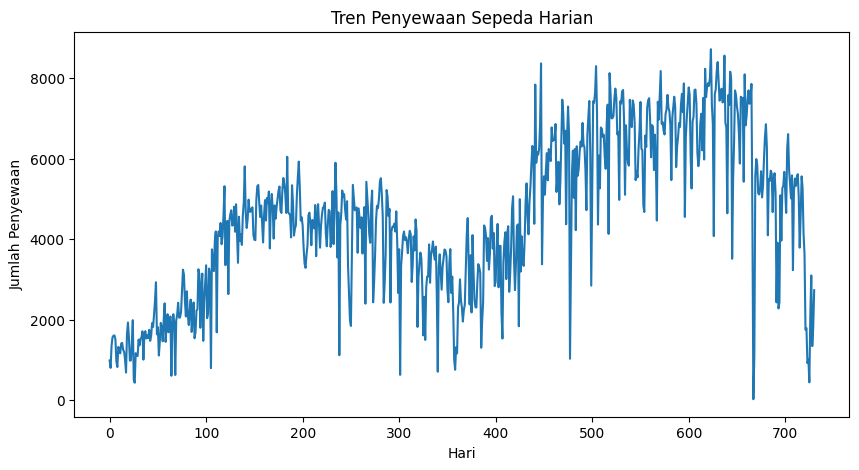

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.index, y=df['cnt'])
plt.title('Tren Penyewaan Sepeda Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.show()

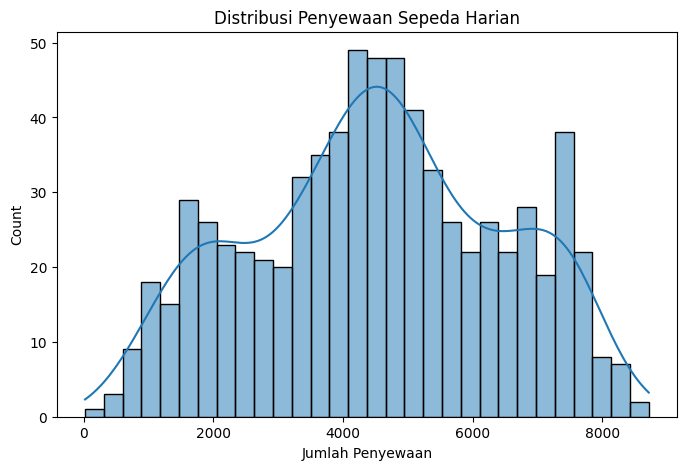

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.show()

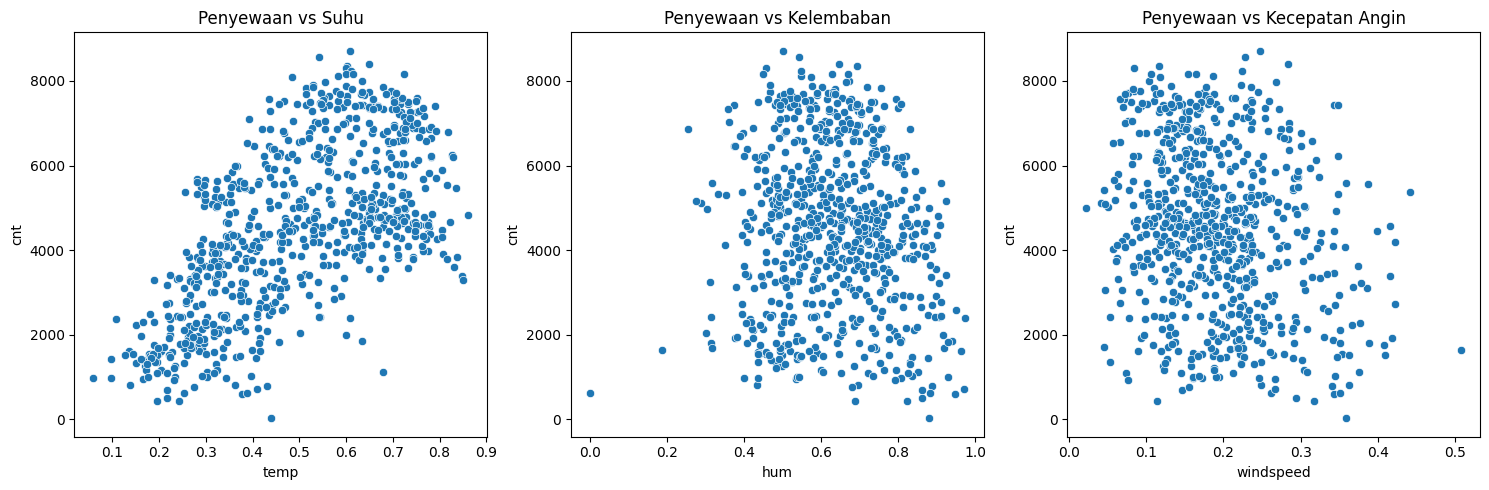

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axes[0], x=df['temp'], y=df['cnt'])
axes[0].set_title('Penyewaan vs Suhu')
sns.scatterplot(ax=axes[1], x=df['hum'], y=df['cnt'])
axes[1].set_title('Penyewaan vs Kelembaban')
sns.scatterplot(ax=axes[2], x=df['windspeed'], y=df['cnt'])
axes[2].set_title('Penyewaan vs Kecepatan Angin')
plt.tight_layout()
plt.show()

**Insight:**
- Tren awal menunjukkan peningkatan jumlah penyewaan seiring waktu. Jumlah penyewaan sepeda cenderung stabil pada angka yang lebih tinggi setelah kurang lebih 400 hari, meskipun tetap terdapat variasi harian yang cukup besar.
- Distribusi yang ditampilkan sepertinya mendekati distribusi normal dengan puncak sekitar 4000–5000 penyewaan per hari. Terdapat beberapa penyewaan dengan jumlah yang lebih tinggi (kurang lebih 8000 penyewaan), yang kemungkinan terjadi pada hari-hari tertentu seperti akhir pekan atau musim tertentu.
- Suhu memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda karena terlihat korelasi positif antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda.
- Kelembaban tidak menunjukkan hubungan yang kuat terhadap jumlah penyewaan sepeda. Tidak terlihat pola yang jelas, penyewaan sepeda tampaknya tersebar merata pada berbagai tingkat kelembaban.
- Kecepatan angin tidak menunjukkan hubungan yang kuat terhadap jumlah penyewaan sepeda. Tidak ada korelasi yang kuat antara kecepatan angin dan jumlah penyewaan sepeda, penyebaran titik yang terlihat cukup acak.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

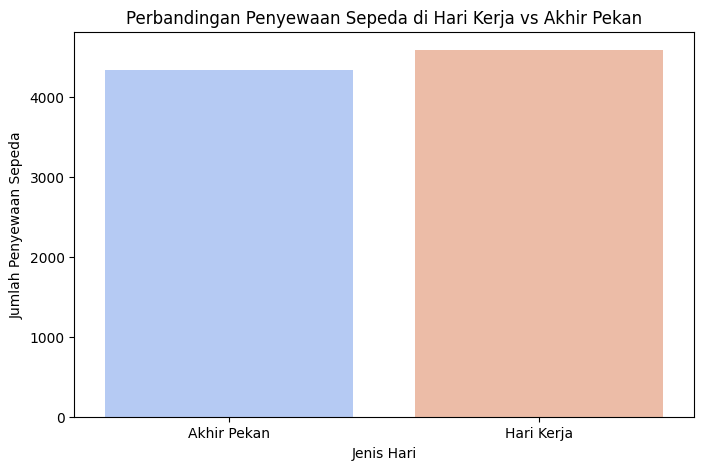

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['workingday'], y=df['cnt'], ci=None, palette="coolwarm")
plt.title("Perbandingan Penyewaan Sepeda di Hari Kerja vs Akhir Pekan")
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks([0, 1], ["Akhir Pekan", "Hari Kerja"])
plt.show()

### Pertanyaan 2:

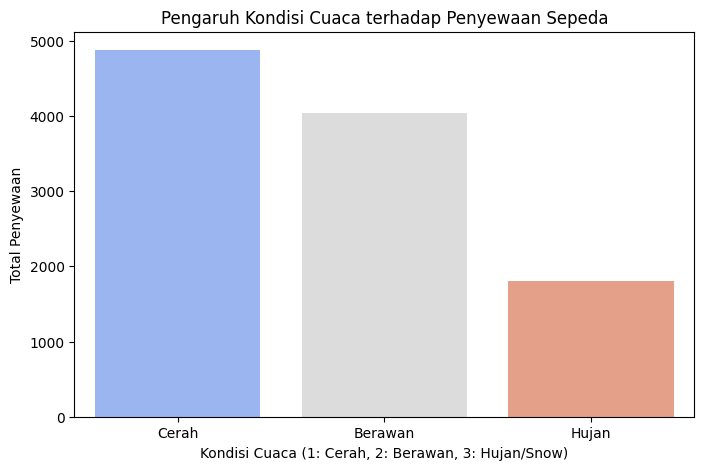

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['weathersit'], y=df['cnt'], ci=None, palette="coolwarm")
plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Hujan/Snow)")
plt.ylabel("Total Penyewaan")
plt.xticks([0, 1, 2], ["Cerah", "Berawan", "Hujan"])
plt.show()

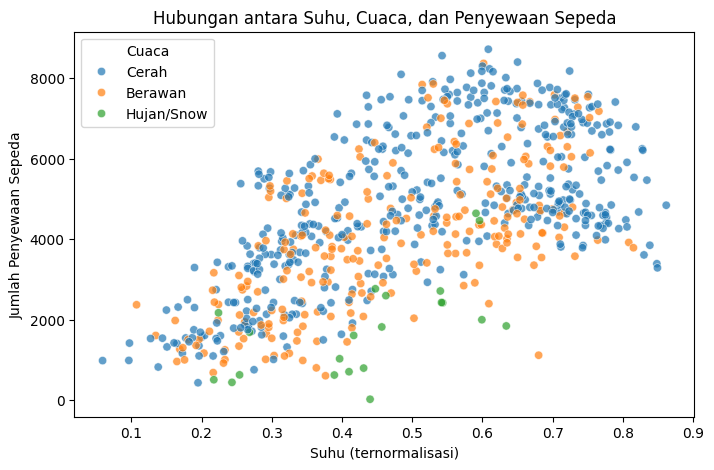

In [ ]:
weather_palette = {1: "#1f77b4",
                   2: "#ff7f0e",
                   3: "#2ca02c"}

plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(x=df['temp'], y=df['cnt'], hue=df['weathersit'],
                          palette=weather_palette, alpha=0.7)

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Cerah", "Berawan", "Hujan"], title="Cuaca")

plt.title("Hubungan antara Suhu, Cuaca, dan Penyewaan Sepeda")
plt.xlabel("Suhu (ternormalisasi)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Bisa dilihat dari hasil visualisasi data yang ditampilkan bahwa Jumlah penyewaan sepeda di hari kerja sedikit lebih banyak dibandingkan dengan akhir pekan. Perbedaannya tidak terlalu signifikan untuk jumlah penyewaan sepeda pada akhir pekan dan hari biasa mungkin disebabkan karena pada hari biasa orang menggunakan sepeda untuk alat transportasi sehari - hari, sedangkan untuk akhir pekan orang - orang juga akan menyewa sepeda untuk berolahrgara atau pergi rekreasi.
- Grafik yang bisa dilihat dari hasil visualisasi data yang telah dilakukan adalah jumlah penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca, dimana saat kondisi cuaca cerah jumlah penyewaan sepeda berada pada puncaknya, dan mengalami penurunan drastis ketika cuaca hujan. Berdasarkan Scatter plot yang ditampilkan pun menunjukkan bahwa suhu sangat berpengaruh terhadap jumlah penyewaan sepeda karena semakin tinggi suhu berarti semakin cerah cuacanya sehingga semakin banyak juga jumlah orang yang akan melakukan sewa sepeda.

## Analisis Lanjutan (Opsional)

Mean Absolute Error (MAE): 1250.58
Mean Squared Error (MSE): 2222329.29
Root Mean Squared Error (RMSE): 1490.75
R-squared (R²): 0.45


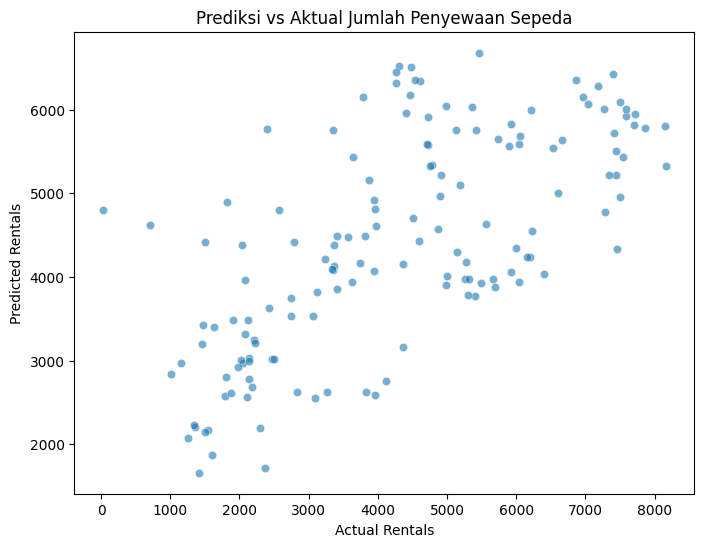

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Memilih fitur yang relevan
features = ["temp", "season"]
target = "cnt"

X = df[features]
y = df[target]

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menginisialisasi dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Mengevaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mencetak hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Melakukan visualisasi hasil prediksi vs data aktual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Prediksi vs Aktual Jumlah Penyewaan Sepeda")
plt.show()

Prediksi untuk jumlah penyewaan sepeda menggunakan variabel suhu dan cuaca tidak bisa dilakukan dengan model yang sederhana, hasilnya tidak akurat karena persebaran datanya yang cukup besar, serta nilai eror nya yang juga cukup besar. Prediksi hanya bisa dilakukan terhadap dataset ini menggunakan model yang lebih kompleks.

## Conclusion

- Jumlah penyewaan sepeda pada hari biasa sedikit lebih banyak dibandingkan jumlah penyewaan sepeda yang dilakukan pada akhir pekan. Hasil selisih yang sedikit ini mungkin disebabkan oleh karena pada hari biasa sebagian besar orang memerlukan sepeda sebagai alat transportasi, dan pada akhir pekan hanya beberapa orang tertentu saja yang ingin menyewa sepeda untuk pergi rekreasi atau berolahraga.
- Jumlah penyewaan sepeda dipengaruhi oleh cuaca dan suhu. Karena suhu yang semakin tinggi menandakan cuaca yang semakin cerah membuat jumlah penyewaan terhadap sepeda semakin tinggi. Cuaca yang cerah mendorong orang untuk beraktivitas lebih baik di ruangan terbuka sehingga sepeda dibutuhkan sebagai salah satu alat transportasi paling efisien, sedangkan pada musim hujan akan merepotkan orang untuk beraktivitas di ruangan terbuka.

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
! wget -q -O - ipv4.icanhazip.com

35.223.194.139


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.194.139:8501

⠴⠦⠧⠇your url is: https://tidy-women-stand.loca.lt
/content/app.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['workingday'], y=df['cnt'], ci=None, palette="coolwarm")
/content/app.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['workingday'], y=df['cnt'], ci=None, palette="coolwarm")
/content/app.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['weathersit'], y=df['cnt'], ci=None, palette="coolwarm")
/content/app.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed